In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy import units as u
from astropy.table import Table
from astropy.time import Time
from astropy.io import fits
import lightkurve as lk
from matplotlib.collections import LineCollection
from tqdm import tqdm_notebook
import stella

from scipy.ndimage import binary_dilation

import glob, os
import tensorflow as tf

from astropy.table import Table
plt.rcParams['font.size'] = 20

import warnings
warnings.filterwarnings('ignore')


In [2]:
name = 'WX UMa'

In [3]:
search = lk.search_targetpixelfile(name,exptime=120,radius=100)

In [4]:
tpf = search[0].download() 

In [5]:
tpf.interact_sky() # WX UMa is Gaia DR2 778947608243864320 - the little dot to the right

In [6]:
tpf.interact(exported_filename='wx_uma.fits') # WX UMa is Gaia DR2 778947608243864320 - the little dot to the right

In [7]:
manual_lc = lk.read('wx_uma.fits')
newmask = fits.open('wx_uma.fits')[2].data

<AxesSubplot:title={'center':'Target ID: 252803603, Cadence: 462945'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

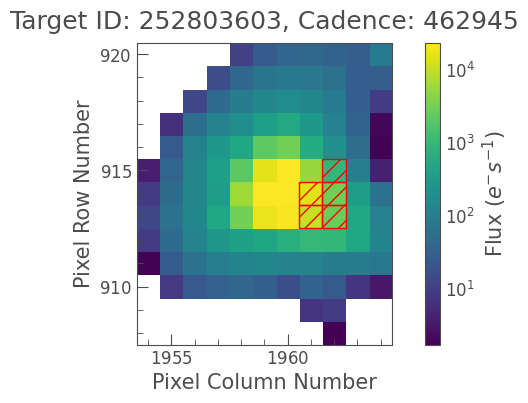

In [8]:
tpf.plot(aperture_mask=newmask,scale='log')

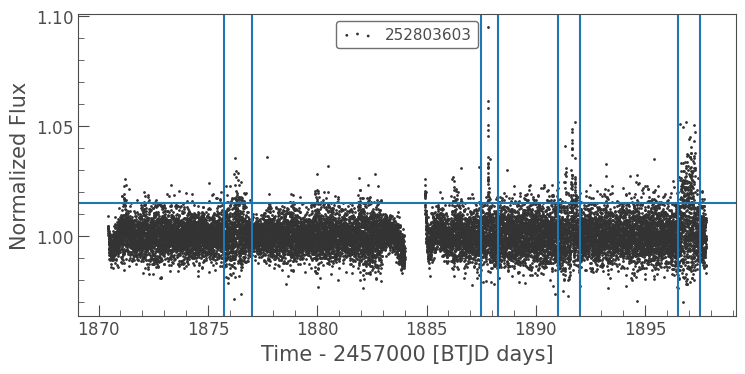

In [9]:
flat, trend = manual_lc.remove_nans().normalize().flatten(window_length=1001,return_trend=True,sigma=2)
flat.scatter()
plt.axhline(1.015)

lims = ((1875.75,1877), (1887.5,1888.25),(1891,1892),(1896.5,1897.5))

m = np.isfinite(flat.flux.value)
for lim in lims:
    m[(flat.time.value>lim[0]) * (flat.time.value<lim[1])] = False
    for l in lim:
        plt.axvline(l)
        


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

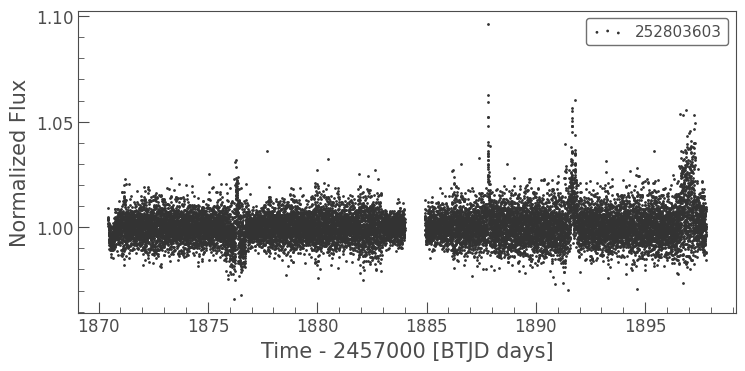

In [10]:
flat, trend = manual_lc.remove_nans().normalize().flatten(window_length=201,return_trend=True,sigma=2,mask=~m)
flat.scatter()


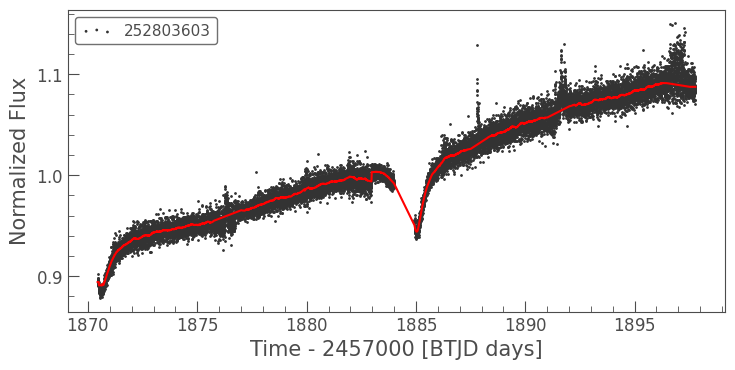

In [11]:
manual_lc.remove_nans().normalize().scatter()
plt.plot(trend.time.value,trend.flux.value,'r')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

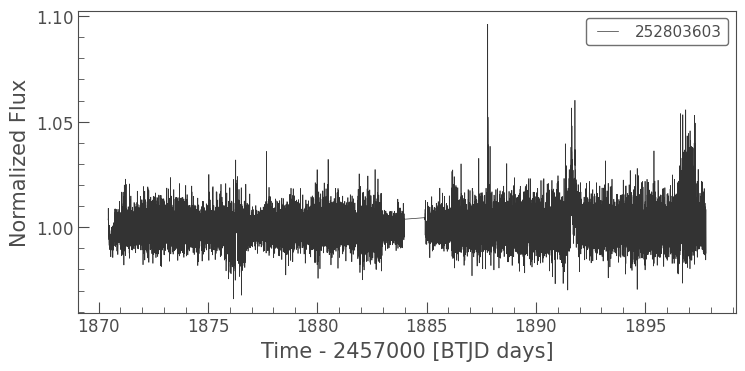

In [12]:
flat.plot()

In [13]:
flat.remove_outliers().flux.value.std()

0.007267472206413808

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}
ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}
